# Eksploracyjna analiza danych

### Badanie miar położenia i rozproszenia
- Użycie metody describe() do wyświetlenia podstawowych miar

### Badanie rozkładu danych
- Boxploty
- Histogramy 
    
### Korelacje
- Wykresy korelacji


In [1]:
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 40)

In [2]:
con = sqlite3.connect('data/start/NBA-Game-Database-combined.sqlite')
tables = pd.read_sql_query(
    "SELECT name FROM sqlite_master WHERE type='table'", con)
tables

,name
0,game_info
1,player_stats
2,team_stats


### Game Info 

In [3]:
game_info = pd.read_sql_query(f"SELECT * FROM \"{'game_info'}\" ORDER BY date", con)
game_info

,game_id,season,date,away_team,away_score,home_team,home_score,result
0,171810170001,1718,2017-10-17,BOS,99,CLE,102,1
1,171810170002,1718,2017-10-17,HOU,122,GSW,121,0
2,171810180003,1718,2017-10-18,CHO,90,DET,102,1
3,171810180004,1718,2017-10-18,BRK,131,IND,140,1
4,171810180005,1718,2017-10-18,MIA,109,ORL,116,1
...,...,...,...,...,...,...,...,...
8286,232404141227,2324,2024-04-14,PHO,125,MIN,106,0
8287,232404141228,2324,2024-04-14,LAL,124,NOP,108,0
8288,232404141229,2324,2024-04-14,DAL,86,OKC,135,1
8289,232404141230,2324,2024-04-14,POR,82,SAC,121,1


In [4]:
game_info.describe().iloc[:,2:]

,away_score,home_score,result
count,8291.000000,8291.000000,8291.000000
mean,110.521771,112.580871,0.562658
std,12.668478,12.669124,0.496088
min,68.000000,69.000000,0.000000
25%,102.000000,104.000000,0.000000
50%,110.000000,112.000000,1.000000
75%,119.000000,121.000000,1.000000
max,176.000000,175.000000,1.000000


### Team Stats

In [5]:
team_stats = pd.read_sql_query(f"SELECT * FROM \"{'team_stats'}\"", con)
# team_stats['game_id'] = team_stats['game_id'] \
#                         .apply(lambda x: int.from_bytes(x, byteorder='little') if isinstance(x, bytes) else x)
# team_stats = team_stats.drop(columns='BPM')
num_cols = team_stats.columns[3:].tolist()
print(num_cols)
team_stats

['FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-', 'TS%', 'eFG%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg', 'Pace', 'game_id', 'win']


,team,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,Pace,game_id,win
0,BOS,240,36.0,88.0,0.409,8.0,32.0,0.250,19.0,25.0,0.760,9.0,37.0,46.0,24.0,11.0,4.0,12.0,24.0,99.0,-99,None,0.500,0.455,0.364,0.284,18.0,80.4,47.9,66.7,11.0,6.6,10.8,100.0,98.7,101.7,100.3,171810170001,0
1,CLE,240,38.0,83.0,0.458,5.0,22.0,0.227,21.0,25.0,0.840,9.0,41.0,50.0,19.0,3.0,4.0,17.0,25.0,102.0,-99,None,0.543,0.488,0.265,0.301,19.6,82.0,52.1,50.0,3.0,7.1,15.3,100.0,101.7,98.7,100.3,171810170001,1
2,HOU,240,47.0,97.0,0.485,15.0,41.0,0.366,13.0,19.0,0.684,10.0,33.0,43.0,28.0,9.0,5.0,13.0,16.0,122.0,-99,None,0.579,0.562,0.423,0.196,22.2,84.6,51.2,59.6,8.8,10.0,11.0,100.0,119.0,118.0,102.5,171810170002,1
3,GSW,240,43.0,80.0,0.538,16.0,30.0,0.533,19.0,21.0,0.905,6.0,35.0,41.0,34.0,5.0,9.0,17.0,25.0,121.0,-99,None,0.678,0.638,0.375,0.263,15.4,77.8,48.8,79.1,4.9,16.1,16.0,100.0,118.0,119.0,102.5,171810170002,0
4,CHO,240,29.0,73.0,0.397,9.0,30.0,0.300,23.0,29.0,0.793,3.0,44.0,47.0,16.0,4.0,3.0,17.0,15.0,90.0,-99,None,0.525,0.459,0.411,0.397,7.3,83.0,50.0,55.2,4.0,4.3,16.5,100.0,90.9,103.1,99.0,171810180003,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16577,OKC,240,54.0,97.0,0.557,14.0,34.0,0.412,13.0,16.0,0.813,11.0,47.0,58.0,38.0,6.0,6.0,15.0,17.0,135.0,-99,None,0.649,0.629,0.351,0.165,27.5,79.7,58.6,70.4,5.7,10.3,12.6,100.0,128.3,81.7,105.2,232404141229,1
16578,POR,240,31.0,98.0,0.316,7.0,45.0,0.156,13.0,17.0,0.765,23.0,31.0,54.0,18.0,11.0,2.0,18.0,19.0,82.0,-99,None,0.389,0.352,0.459,0.173,37.7,70.5,51.4,58.1,11.4,3.8,14.6,100.0,84.7,125.0,96.8,232404141230,0
16579,SAC,240,43.0,87.0,0.494,13.0,34.0,0.382,22.0,27.0,0.815,13.0,38.0,51.0,29.0,11.0,6.0,14.0,19.0,121.0,-99,None,0.612,0.569,0.391,0.310,29.5,62.3,48.6,67.4,11.4,11.3,12.4,100.0,125.0,84.7,96.8,232404141230,1
16580,DET,240,36.0,92.0,0.391,8.0,33.0,0.242,15.0,20.0,0.750,11.0,29.0,40.0,17.0,7.0,3.0,14.0,9.0,95.0,-99,None,0.471,0.435,0.359,0.217,20.8,70.7,42.6,47.2,7.0,5.3,12.2,100.0,95.5,123.6,99.5,232404141231,0


In [6]:
team_stats.describe().iloc[:,1:16]

,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV
count,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16581.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000
mean,88.246110,0.466445,12.039079,33.430829,0.359424,17.355325,22.396514,0.775166,10.193161,33.970148,44.163310,24.816186,7.564588,4.863949,14.020142
std,7.092982,0.054936,3.888211,7.198849,0.085695,5.923015,7.140385,0.101922,3.746911,5.446475,6.615614,5.127855,2.888728,2.483904,3.899584
min,63.000000,0.269000,1.000000,10.000000,0.056000,0.000000,0.000000,0.143000,0.000000,16.000000,22.000000,8.000000,0.000000,0.000000,1.000000
25%,83.000000,0.429000,9.000000,28.000000,0.300000,13.000000,17.000000,0.714000,8.000000,30.000000,40.000000,21.000000,6.000000,3.000000,11.000000
50%,88.000000,0.465000,12.000000,33.000000,0.357000,17.000000,22.000000,0.780000,10.000000,34.000000,44.000000,25.000000,7.000000,5.000000,14.000000
75%,93.000000,0.505000,15.000000,38.000000,0.417000,21.000000,27.000000,0.846000,13.000000,38.000000,49.000000,28.000000,9.000000,6.000000,17.000000
max,123.000000,0.687000,29.000000,70.000000,0.842000,44.000000,64.000000,1.000000,29.000000,60.000000,74.000000,50.000000,22.000000,20.000000,30.000000


In [7]:
team_stats.describe().iloc[:,16:]

,PF,PTS,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,Pace,game_id,win
count,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.0,16582.000000,16582.000000,16582.000000,1.658200e+04,16582.000000
mean,19.875769,111.551321,0.569697,0.534901,0.379393,0.256799,22.904535,77.096424,50.000862,60.382686,7.585285,8.894048,12.501152,100.0,112.097377,112.097377,98.926945,2.023168e+11,0.500000
std,4.230014,12.710188,0.061734,0.066080,0.078400,0.088912,7.233284,7.233376,5.323689,9.610409,2.835873,4.403028,3.384682,0.0,11.697051,11.697051,4.775795,2.053617e+10,0.500015
min,4.000000,68.000000,0.356000,0.301000,0.109000,0.000000,0.000000,44.200000,31.500000,27.000000,0.000000,0.000000,1.000000,100.0,67.800000,67.800000,82.700000,1.718010e+11,0.000000
25%,17.000000,103.000000,0.527000,0.489000,0.326000,0.194000,17.800000,72.200000,46.400000,53.800000,5.500000,5.700000,10.100000,100.0,104.300000,104.300000,95.700000,1.819111e+11,0.000000
50%,20.000000,111.000000,0.568000,0.533000,0.376000,0.247000,22.700000,77.300000,50.000000,60.500000,7.400000,8.500000,12.400000,100.0,112.100000,112.100000,98.800000,2.021033e+11,0.500000
75%,23.000000,120.000000,0.611000,0.579000,0.430000,0.311000,27.800000,82.200000,53.600000,66.700000,9.400000,11.600000,14.700000,100.0,119.900000,119.900000,102.000000,2.223030e+11,1.000000
max,42.000000,176.000000,0.808000,0.795000,0.692000,0.790000,55.800000,100.000000,68.500000,91.900000,21.100000,40.400000,29.300000,100.0,158.400000,158.400000,118.700000,2.324123e+11,1.000000


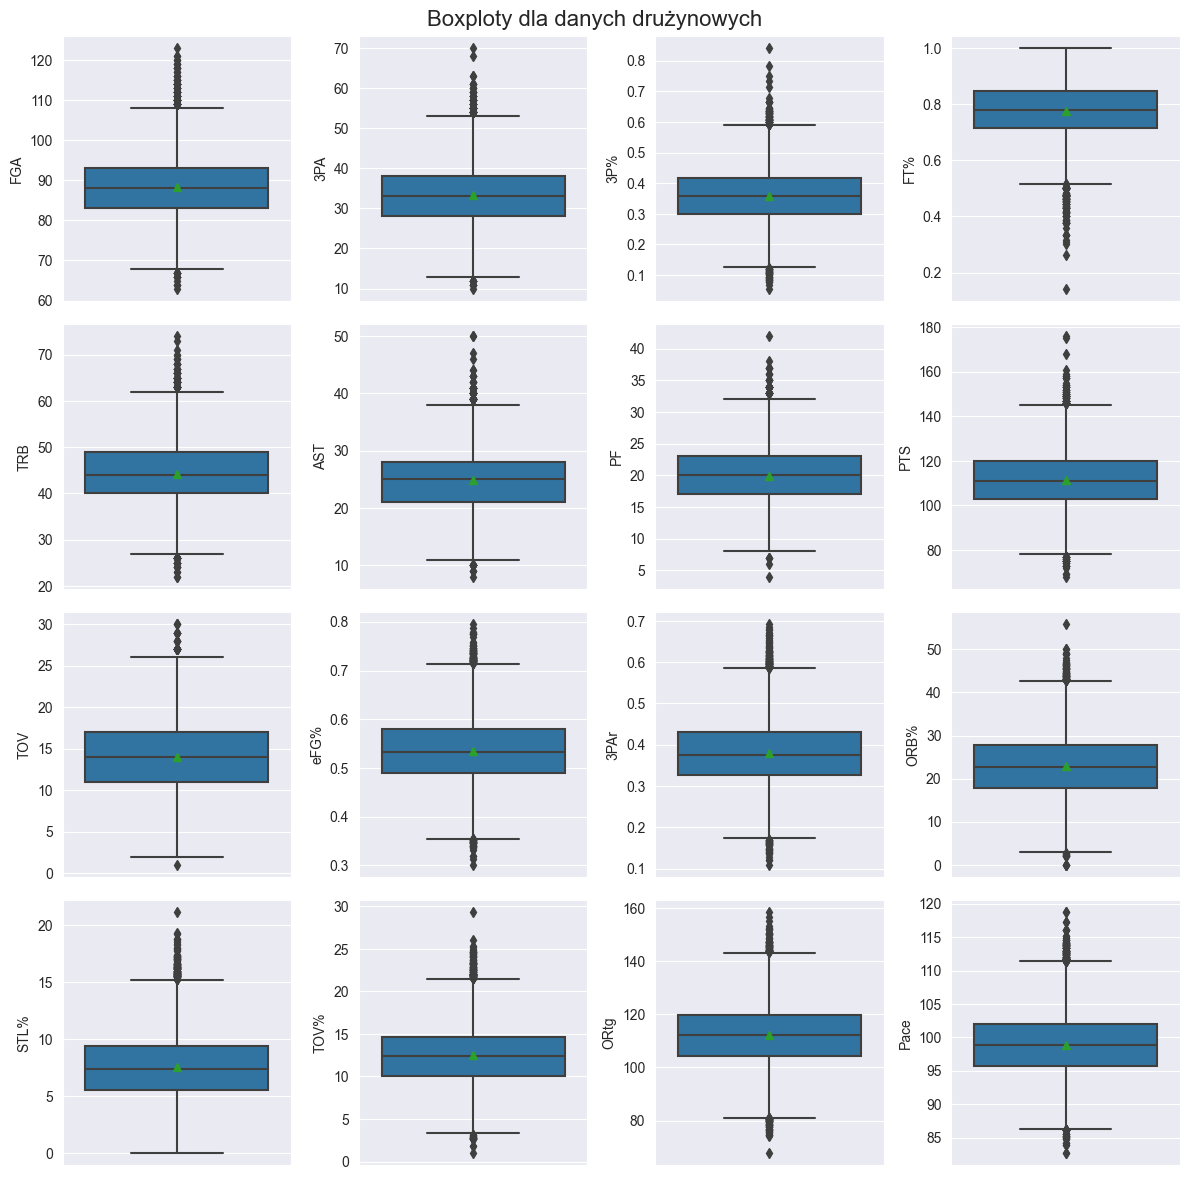

In [8]:
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
fig.patch.set_facecolor('white')
fig.suptitle('Boxploty dla danych drużynowych', fontsize=16)
for i,column in enumerate(['FGA', '3PA', '3P%',  'FT%', 
               'TRB', 'AST', 'PF', 'PTS', 
               'TOV', 'eFG%', '3PAr', 'ORB%',  
               'STL%',  'TOV%', 'ORtg', 'Pace']):
    sns.boxplot(team_stats, y=column, ax=axs[i//4, i%4], showmeans=True)
plt.tight_layout()
plt.savefig("graphs/boxplots_team.png", dpi=300, bbox_inches='tight')
plt.show()

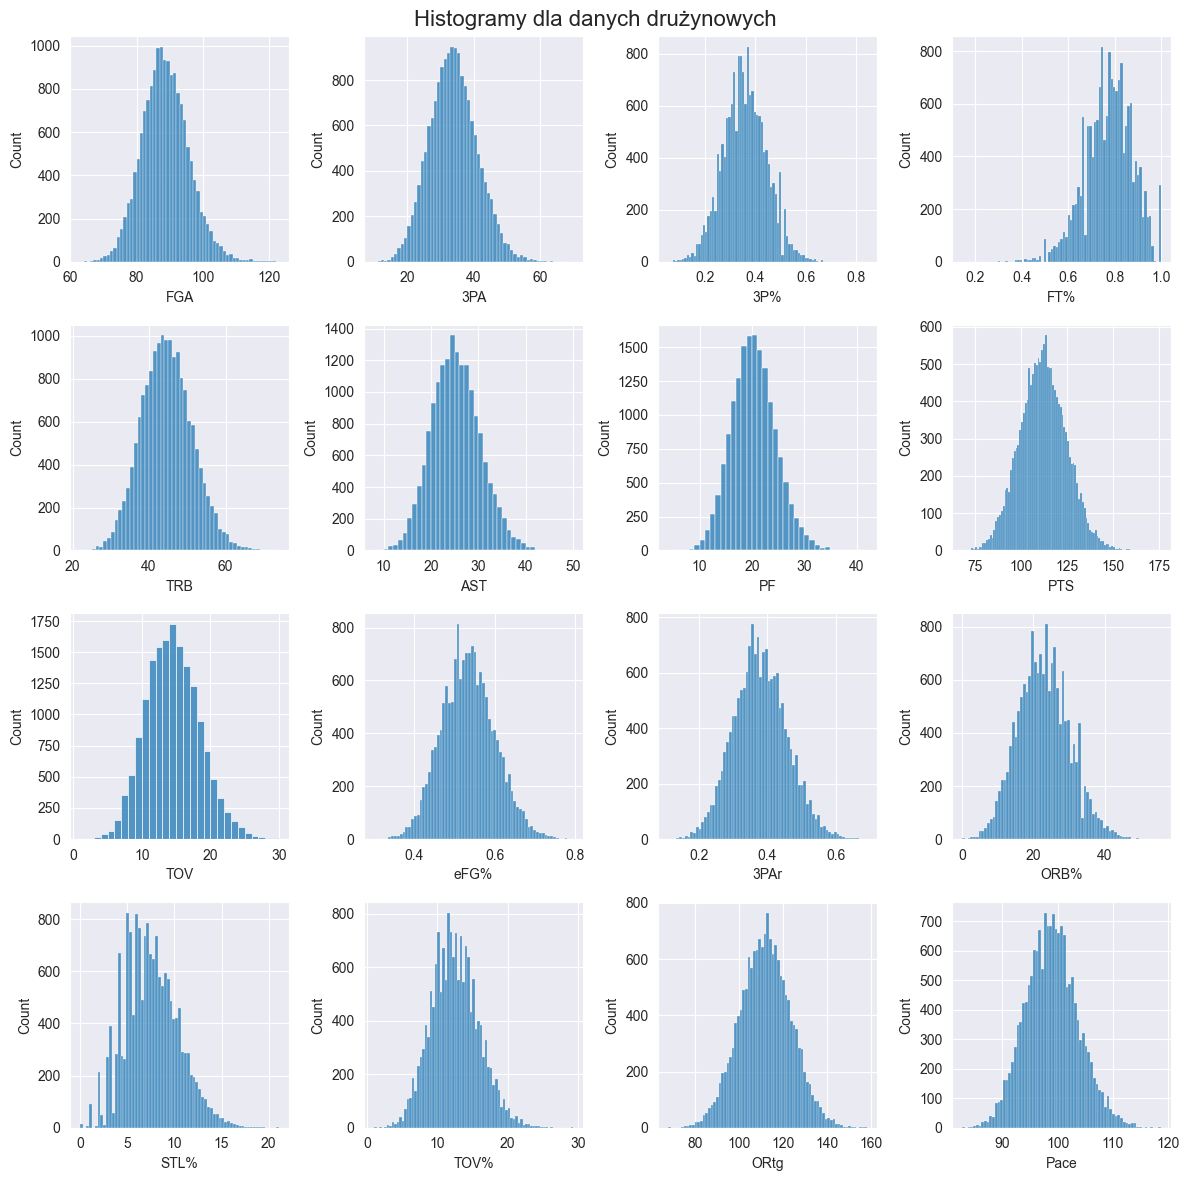

In [9]:
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
fig.patch.set_facecolor('white')
fig.suptitle('Histogramy dla danych drużynowych', fontsize=16)
for i,column in enumerate(['FGA', '3PA', '3P%',  'FT%', 
               'TRB', 'AST', 'PF', 'PTS', 
               'TOV', 'eFG%', '3PAr', 'ORB%',  
               'STL%',  'TOV%', 'ORtg', 'Pace']):
    if column in ['TOV', 'PF', 'AST', 'FGA', '3PA', 'TRB', 'AST', 'PTS',]:
        sns.histplot(team_stats, x=column, element='bars', ax=axs[i//4, i%4], binwidth=1)
        continue
    sns.histplot(team_stats, x=column, element='bars', ax=axs[i//4, i%4])

plt.tight_layout()
plt.savefig("graphs/histograms_team.png", dpi=300, bbox_inches='tight')
plt.show()

In [10]:
team_stats['win'] = team_stats.groupby('game_id')['PTS'].transform(lambda x: x == x.max()).astype(int)
# team_stats.to_sql('team_stats', con, if_exists='replace', index=False)

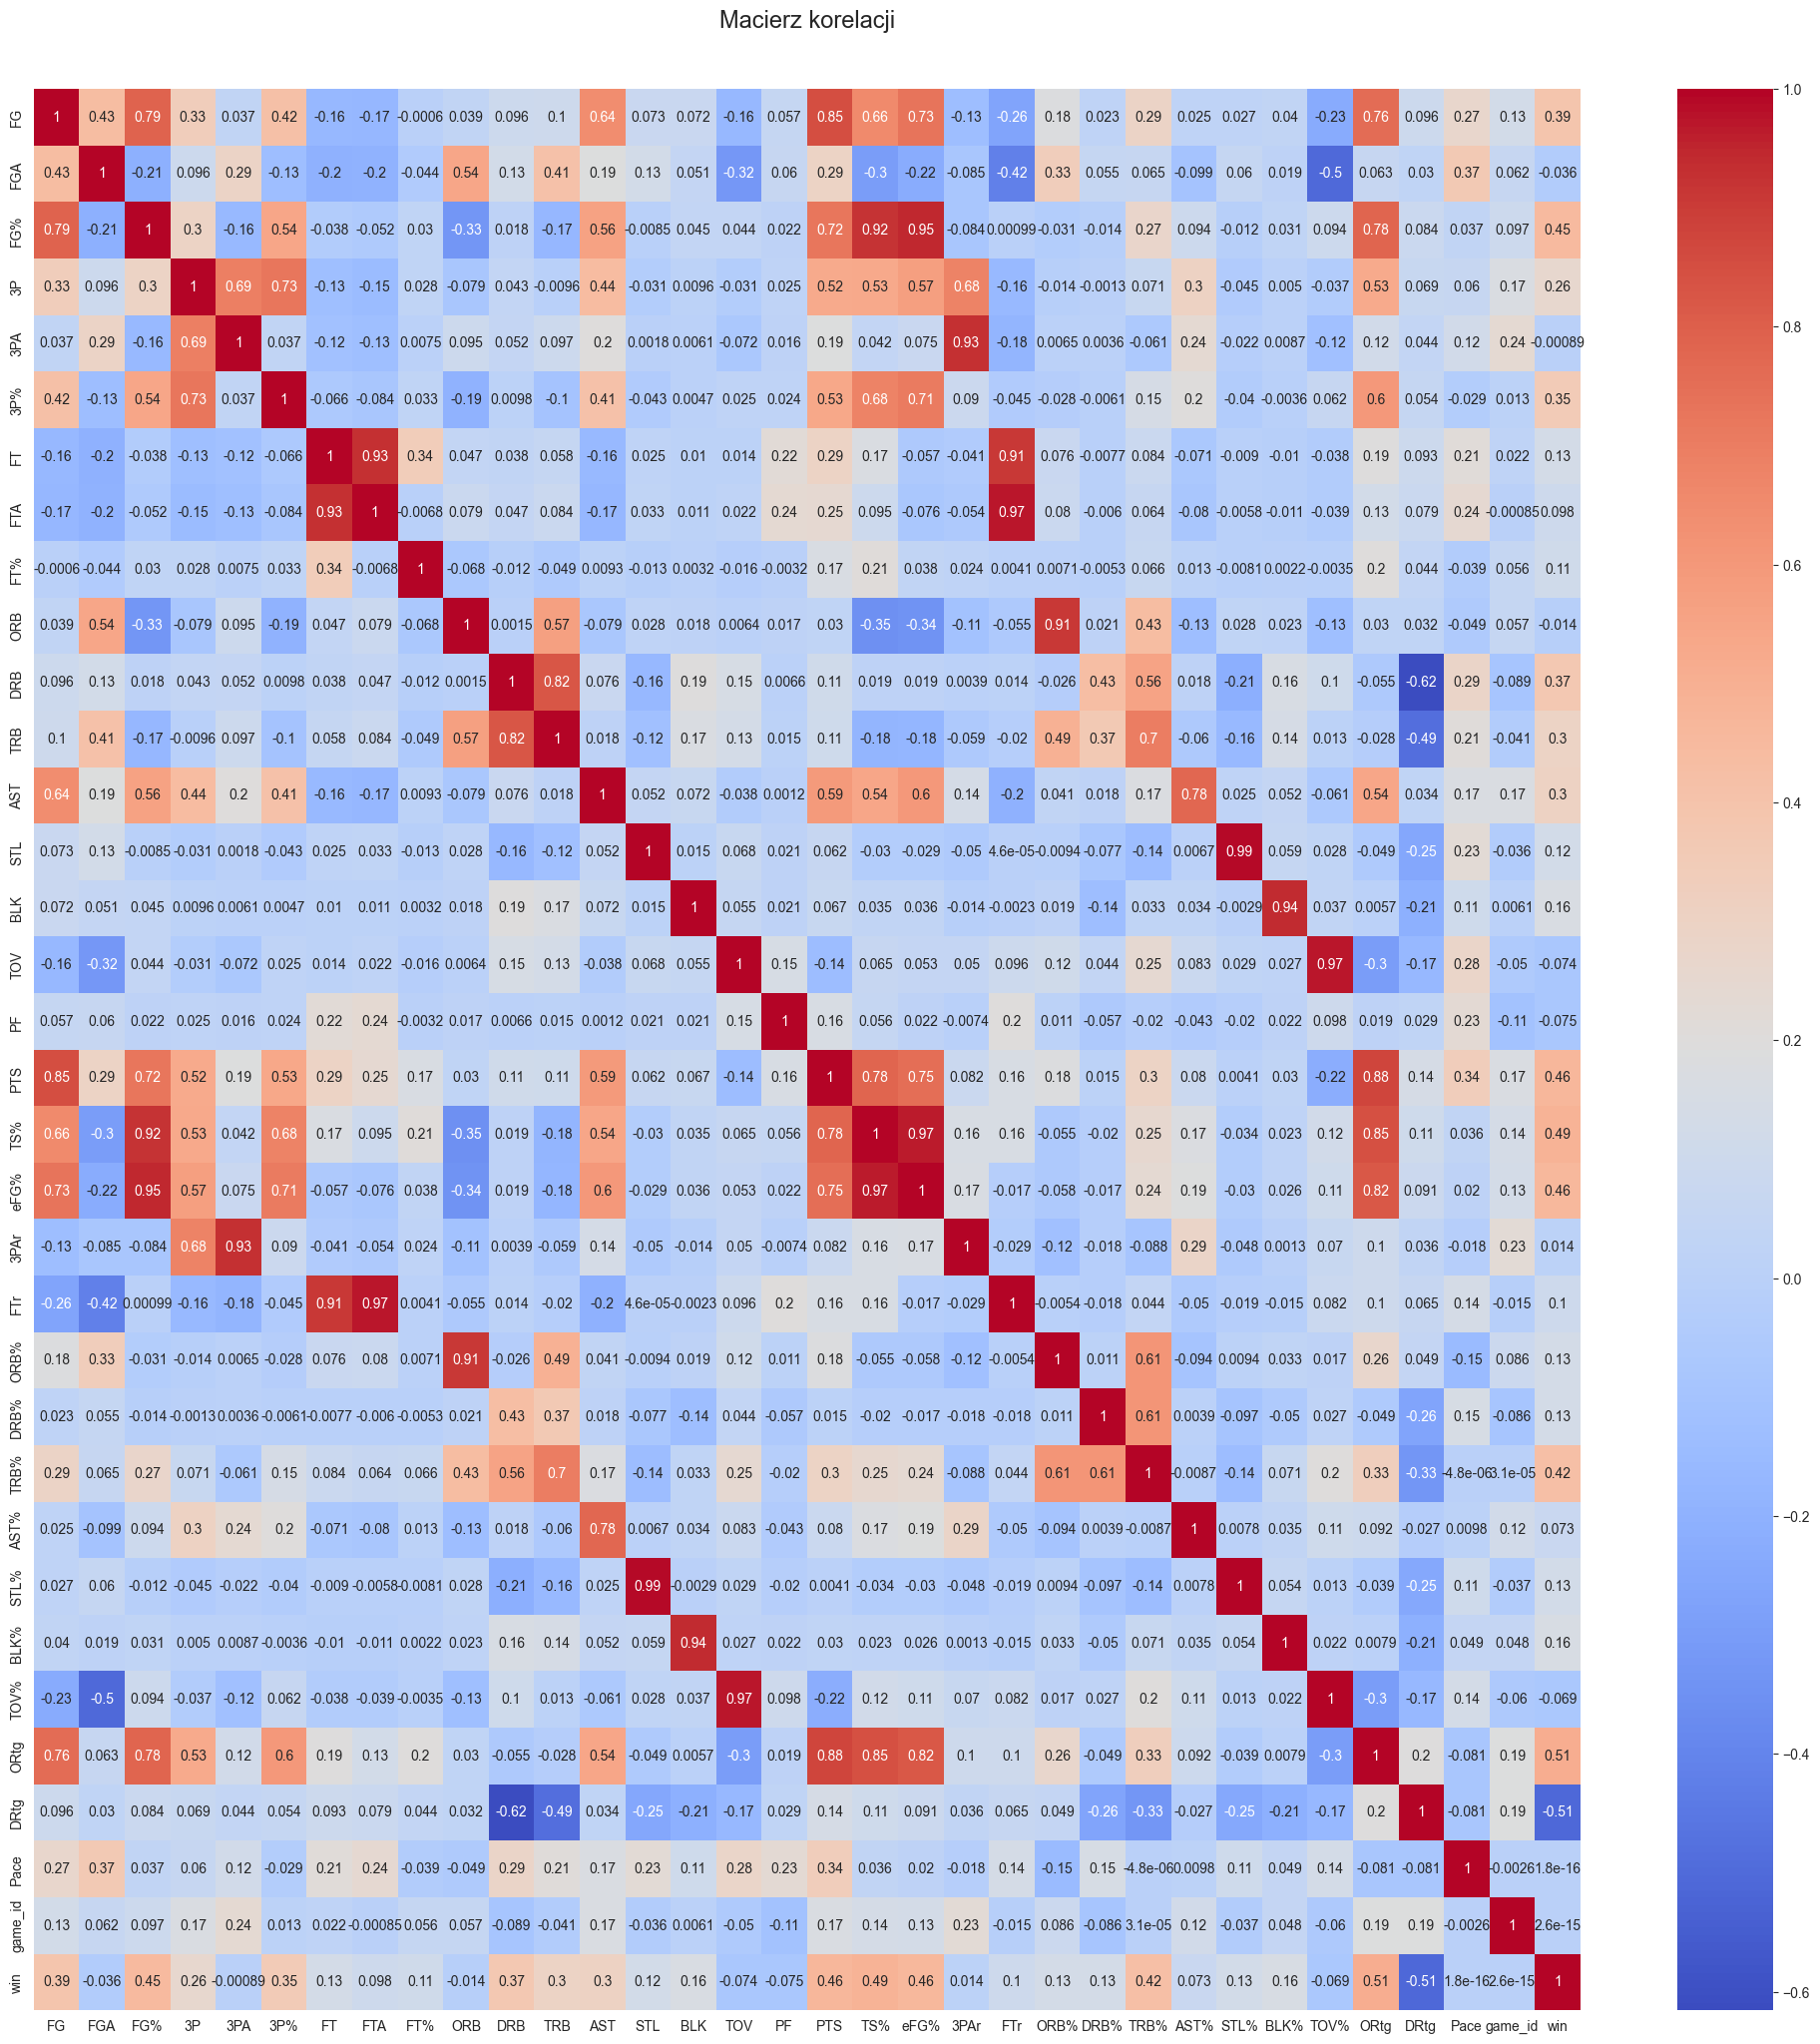

In [11]:
corr_matrix = team_stats.select_dtypes(include=[np.number]) \
  .corr() \
  .dropna(axis=0, how='all') \
  .dropna(axis=1, how='all')

plt.figure(figsize=(25, 25))
heatmap1 = sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
heatmap1.set_title('Macierz korelacji\n\n', fontsize=17)

# _ = heatmap1.set_yticklabels(corr_matrix.index, size=14)
# _ = heatmap1.set_xticklabels(heatmap1.get_xticklabels(), size=14, rotation=45)
plt.savefig("graphs/corr_team.png", dpi=300, bbox_inches='tight')
plt.show()

### Player stats

In [12]:
player_stats = pd.read_sql_query(f"SELECT * FROM \"{'player_stats'}\"", con)
player_stats

,game_id,player,team,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,BPM,PIE
0,171810170001,Jaylen Brown,BOS,39:36,11.0,23.0,0.478,2.0,9.0,0.222,1.0,2.0,0.500,1.0,5.0,6.0,0.0,2.0,0.0,3.0,5.0,25.0,12.1,-5.0,0.523,0.522,0.391,0.087,2.4,13.2,7.6,0.0,2.4,0.0,11.2,29.9,89.0,104.0,-3.1,7.0
1,171810170001,Kyrie Irving,BOS,39:21,8.0,17.0,0.471,4.0,9.0,0.444,2.0,2.0,1.000,2.0,2.0,4.0,10.0,3.0,0.0,2.0,4.0,22.0,21.7,1.0,0.615,0.588,0.529,0.118,4.9,5.3,5.1,46.5,3.7,0.0,10.1,22.2,124.0,103.0,10.5,14.0
2,171810170001,Jayson Tatum,BOS,36:32,5.0,12.0,0.417,1.0,2.0,0.500,3.0,3.0,1.000,4.0,6.0,10.0,3.0,0.0,0.0,1.0,4.0,14.0,11.7,8.0,0.526,0.458,0.167,0.250,10.5,17.1,13.7,13.4,0.0,0.0,7.0,17.3,115.0,108.0,-1.3,7.9
3,171810170001,Al Horford,BOS,32:07,2.0,7.0,0.286,0.0,2.0,0.000,5.0,7.0,0.714,0.0,7.0,7.0,5.0,0.0,1.0,0.0,2.0,9.0,9.6,8.0,0.446,0.286,0.286,1.000,0.0,22.7,10.9,22.6,0.0,2.5,0.0,13.8,111.0,105.0,0.2,7.6
4,171810170001,Gordon Hayward,BOS,5:15,1.0,2.0,0.500,0.0,1.0,0.000,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.9,3.0,0.500,0.500,0.500,0.000,0.0,19.9,9.5,0.0,0.0,0.0,0.0,16.8,95.0,107.0,-7.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212349,232404141231,RaiQuan Gray,SAS,22:35,5.0,9.0,0.556,0.0,2.0,0.000,0.0,0.0,NaN,2.0,3.0,5.0,4.0,0.0,1.0,0.0,0.0,10.0,11.5,15.0,0.556,0.556,0.222,0.000,10.4,12.0,11.3,22.2,0.0,3.6,0.0,17.4,141.0,99.0,2.8,7.0
212350,232404141231,Jamaree Bouyea,SAS,22:28,2.0,4.0,0.500,1.0,1.0,1.000,0.0,0.0,NaN,1.0,7.0,8.0,2.0,0.0,0.0,1.0,5.0,5.0,4.2,12.0,0.625,0.625,0.250,0.000,5.2,28.2,18.2,9.6,0.0,0.0,20.0,9.7,121.0,96.0,-7.3,3.1
212351,232404141231,David Duke Jr.,SAS,21:44,6.0,8.0,0.750,2.0,3.0,0.667,1.0,1.0,1.000,1.0,2.0,3.0,0.0,1.0,0.0,2.0,2.0,15.0,11.3,11.0,0.889,0.875,0.375,0.125,5.4,8.3,7.0,0.0,2.2,0.0,19.2,20.9,130.0,98.0,1.7,6.0
212352,232404141231,Devonte' Graham,SAS,18:43,4.0,8.0,0.500,4.0,7.0,0.571,0.0,0.0,NaN,0.0,1.0,1.0,2.0,0.0,0.0,3.0,0.0,12.0,6.7,4.0,0.750,0.750,0.875,0.000,0.0,4.8,2.7,13.2,0.0,0.0,27.3,25.6,104.0,104.0,-2.1,3.8


In [13]:
player_stats.describe().iloc[:,1:19]

,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,176014.000000,176014.000000,167765.000000,176014.000000,176014.000000,135967.000000,176014.000000,176014.000000,98604.000000,176014.000000,176014.000000,176014.000000,176014.000000,176014.000000,176014.000000,176014.00000,176014.000000,176014.000000
mean,3.869454,8.312362,0.454178,1.133995,3.148982,0.331427,1.634739,2.109611,0.762436,0.960100,3.199831,4.159930,2.337592,0.712585,0.458157,1.26065,1.872135,10.507641
std,3.191516,5.910339,0.236798,1.451992,2.970975,0.293096,2.299629,2.772843,0.283700,1.341695,2.750353,3.475532,2.566056,0.952405,0.824071,1.39498,1.467594,8.611221
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,4.000000,0.333000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,4.000000
50%,3.000000,7.000000,0.462000,1.000000,3.000000,0.333000,1.000000,1.000000,0.833000,1.000000,3.000000,3.000000,2.000000,0.000000,0.000000,1.00000,2.000000,9.000000
75%,6.000000,12.000000,0.600000,2.000000,5.000000,0.500000,2.000000,3.000000,1.000000,1.000000,5.000000,6.000000,3.000000,1.000000,1.000000,2.00000,3.000000,15.000000
max,25.000000,47.000000,1.000000,14.000000,24.000000,1.000000,26.000000,32.000000,1.000000,15.000000,23.000000,31.000000,25.000000,10.000000,10.000000,12.00000,6.000000,73.000000


In [14]:
player_stats.describe().iloc[:,19:]

,+/-,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,BPM,PIE
count,175775.000000,168709.000000,167765.000000,167765.000000,167765.000000,175970.000000,175970.000000,175970.000000,175969.000000,175970.000000,175970.000000,170002.000000,175970.000000,175970.000000,175970.000000,175987.000000,176014.000000
mean,0.000216,0.550197,0.520535,0.389869,0.274094,4.788866,15.176297,10.008319,13.933312,1.487423,1.800108,12.414183,18.961629,107.162806,113.003654,-1.276666,4.741088
std,11.266277,0.261901,0.274652,0.288528,0.428646,7.580722,12.284822,7.928391,15.156984,2.398546,3.793678,14.619134,9.064909,48.009345,13.927253,12.879639,4.613732
min,-58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-475.000000,-1000.000000,-9.300000
25%,-7.000000,0.409000,0.364000,0.167000,0.000000,0.000000,6.700000,4.700000,0.000000,0.000000,0.000000,0.000000,13.100000,83.000000,104.000000,-7.000000,1.200000
50%,0.000000,0.557000,0.500000,0.375000,0.154000,2.200000,13.300000,8.600000,10.800000,0.000000,0.000000,10.000000,18.400000,110.000000,113.000000,-1.100000,3.900000
75%,7.000000,0.700000,0.667000,0.571000,0.400000,7.000000,21.400000,13.800000,21.000000,2.400000,2.800000,18.400000,24.300000,133.000000,122.000000,4.800000,7.400000
max,57.000000,1.500000,1.500000,1.000000,14.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,300.000000,165.000000,901.900000,36.700000


AST% błąd gruby (min -1000)

In [15]:
player_stats['NetRtg'] = player_stats['ORtg'] - player_stats['DRtg']

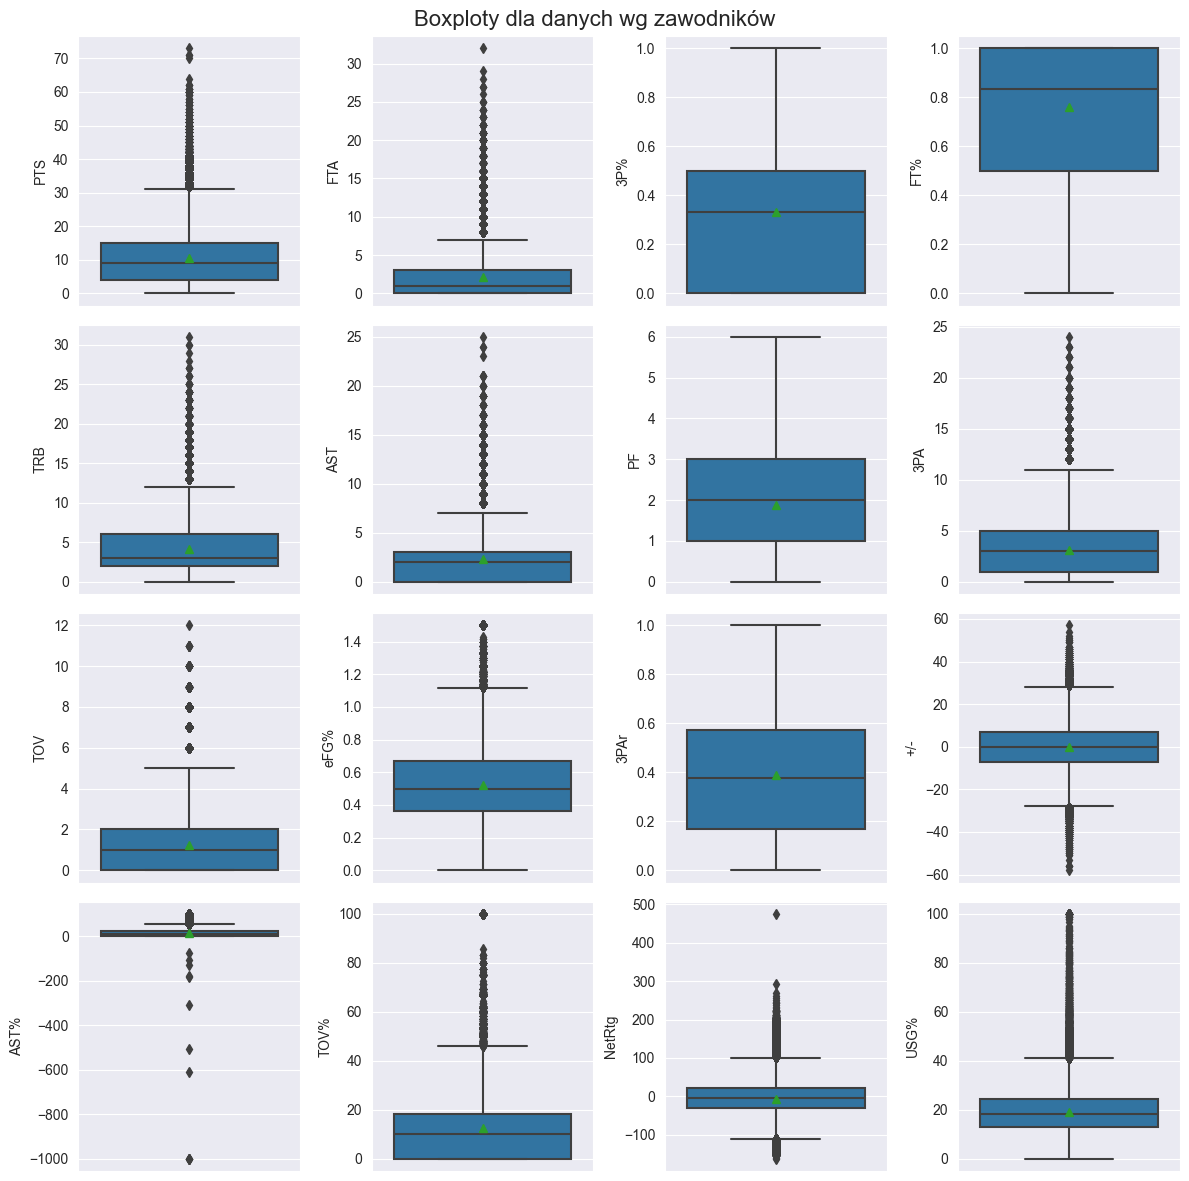

In [16]:
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
fig.patch.set_facecolor('white')
fig.suptitle('Boxploty dla danych wg zawodników', fontsize=16)
for i,column in enumerate(['PTS', 'FTA', '3P%',  'FT%',
               'TRB', 'AST', 'PF', '3PA',
               'TOV', 'eFG%', '3PAr', '+/-',
               'AST%',  'TOV%', 'NetRtg', 'USG%']):
    sns.boxplot(player_stats, y=column, ax=axs[i//4, i%4], showmeans=True)

plt.tight_layout()
plt.savefig("graphs/boxplots_players.png", dpi=300, bbox_inches='tight')
plt.show()

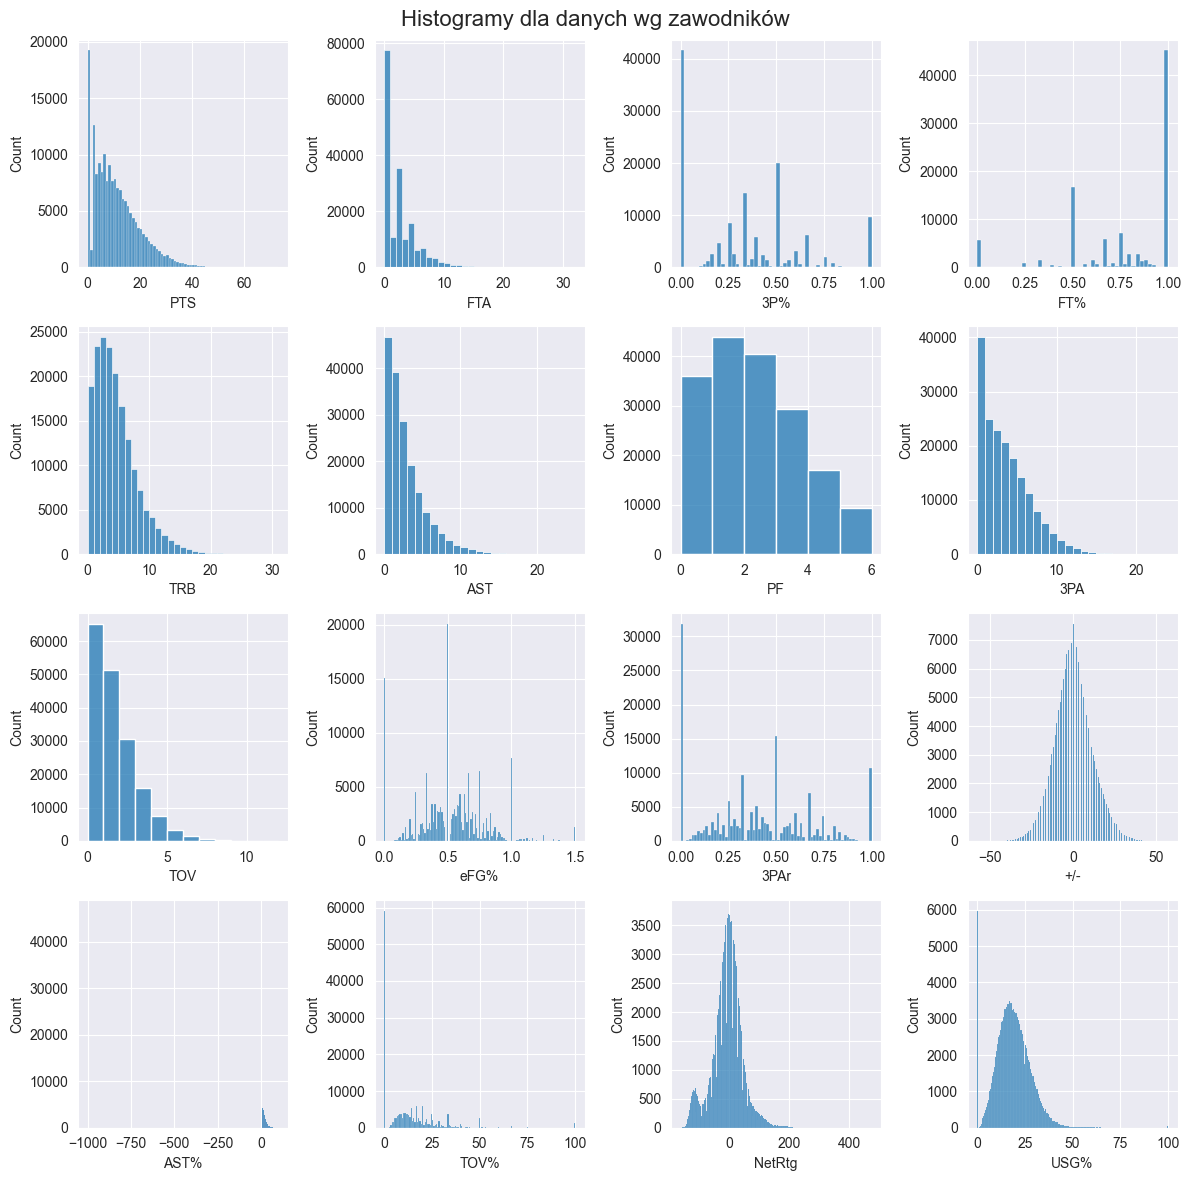

In [17]:
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
fig.patch.set_facecolor('white')
fig.suptitle('Histogramy dla danych wg zawodników', fontsize=16)
for i,column in enumerate(['PTS', 'FTA', '3P%',  'FT%',
               'TRB', 'AST', 'PF', '3PA',
               'TOV', 'eFG%', '3PAr', '+/-',
               'AST%',  'TOV%', 'NetRtg', 'USG%']):
    if column in ['TOV', 'PF', 'AST', 'FGA', '3PA', 'TRB', 'AST', 'PTS', 'FTA']:
        sns.histplot(player_stats, x=column, element='bars', ax=axs[i//4, i%4], binwidth=1)
        continue
    sns.histplot(player_stats, x=column, element='bars', ax=axs[i//4, i%4])

plt.tight_layout()
plt.savefig("graphs/histograms_players.png", dpi=300, bbox_inches='tight')
plt.show()

In [18]:
con.close()